(1, 256, 256, 32)


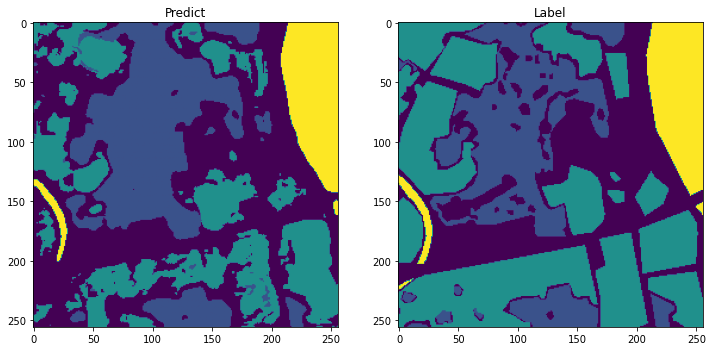

In [1]:
import matplotlib.pyplot as plt
import cv2
from osgeo import gdal
import numpy as np
from keras.models import load_model
from keras import losses
import datetime
import math
import sys

def load_img(path):
    dataset = gdal.Open(path)
    im_width = dataset.RasterXSize
    im_height = dataset.RasterYSize
    im_data = dataset.ReadAsArray(0,0,im_width,im_height)
    
    im_data = im_data.transpose((1,2,0))
    return im_data

#  Label visualization, that is, assign the n value to the nth category
def labelVisualize(img):
    img_out = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_out[i][j] = np.argmax(img[i][j])
    return img_out

def normalize(img):
    minlist = [414, 457, 408, 325, 321, 352, 273, 262, 246, 258, 151, 124, 114, 119, 108, 135, 107, 99, 117, 93, 121, 127, 125, 138, 109, 107, 97, 100, 101, 68, 62, 57]
    diflist = [599, 566, 615, 698, 702, 671, 750, 761, 777, 765, 872, 899, 909, 904, 915, 888, 876, 848, 906, 703, 900, 896, 872, 762, 656, 682, 672, 739, 635, 510, 445, 198]

    img = img.astype(np.float32)
    for i in range(32):
        img[i][np.where(img[i]==0)]=minlist[i]
        img[i] = (img[i]-minlist[i])/diflist[i]
    return img

#  Get the result matrix

#  PATH parameter and number of image 
num = 49

TifPath = "./comp/train/imagescut/" + str(num) + ".tif"
ModelPath = r"./Model/unet_model_7.hdf5"

im_data = load_img(TifPath)

im_data = im_data.swapaxes(1, 2)
im_data = im_data.swapaxes(1, 0)

im_data = normalize(im_data)

im_data = im_data.swapaxes(1, 0)
im_data = im_data.swapaxes(1, 2)

im_data = np.reshape(im_data, (1, im_data.shape[0], im_data.shape[1], im_data.shape[2]))

model = load_model(ModelPath)
results = model.predict(im_data)

print(im_data.shape)
im_data = labelVisualize(results[0])

label = np.array(plt.imread("./comp/train/labelscut/" + str(num) + ".tif"))
label[label==255] = 0

fig = plt.figure(figsize=(12,20))
ax = fig.subplots(1,2)
ax[0].set_title('Predict')
ax[0].imshow(im_data)
ax[1].set_title('Label')
ax[1].imshow(label)